In [7]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import pipeline

In [8]:
# Création du radar chart
def create_radar_chart(model, emotions, percentages):
    angles = np.linspace(0, 2 * np.pi, len(emotions), endpoint=False).tolist()
    percentages += percentages[:1]  # Boucle le dernier point au début pour fermer le cercle
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, percentages, color='red', alpha=0.25)
    ax.plot(angles, percentages, color='red', linewidth=2)

    # Suppression des labels de pourcentage sur les rayons
    ax.set_yticklabels([])

    # Définir les étiquettes des émotions sur le diagramme
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions)
    ax.set_title(f"Radar Chart for Model: {model}", size=15, color='red', y=1.1)
    
    plt.show()

In [9]:
models = ["bhadresh-savani/distilbert-base-uncased-emotion", # Not good results
          "bhadresh-savani/roberta-base-emotion", # Not good results
          "j-hartmann/emotion-english-distilroberta-base", # Interesting results
          "j-hartmann/emotion-english-roberta-large", # Interesting results
          "AnkitAI/deberta-xlarge-base-emotions-classifier", # Only one result
          "arpanghoshal/EmoRoBERTa", # Need to check the license
          "cardiffnlp/twitter-roberta-base-emotion",
          "cardiffnlp/twitter-roberta-large-emotion-latest", # Maybe one of the best
          "cardiffnlp/twitter-roberta-base-emotion-latest",
          ]

In [10]:
def train_classifier(model):
    classifier = pipeline("text-classification", model=model)
    # sentence = "I fear that something bad is going to happen to my lovely cat, I will be so sad if it happens"
    # sentence = "I bit the inside of my cheek as I stared down at the three pieces of paper."
    # sentence = "Perhaps if I were told what this was all about, I wouldn't feel so inclined to resist."
    sentence = "Ask not what your country can do for you; ask what you can do for your country."
    result = classifier(sentence, top_k=None)
    return result

In [11]:
def get_emotions(model):
    result = train_classifier(model)
    emotions = [item['label'] for item in result]
    percentages = [item['score'] * 100 for item in result]
    create_radar_chart(model, emotions, percentages)

Model: bhadresh-savani/distilbert-base-uncased-emotion


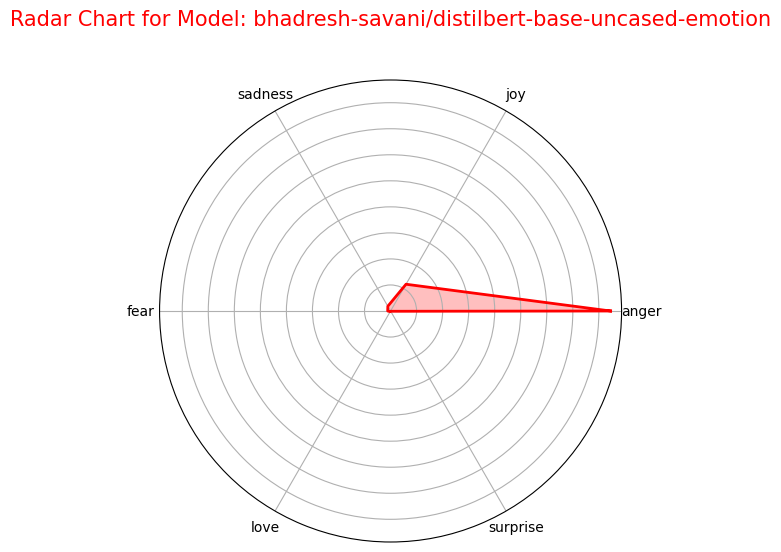

Model: bhadresh-savani/roberta-base-emotion


/usr/local/python/3.10.13/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


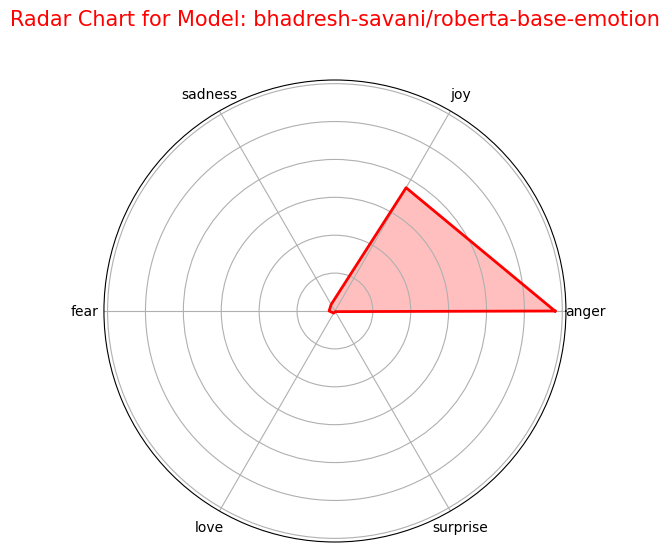

Model: j-hartmann/emotion-english-distilroberta-base


/usr/local/python/3.10.13/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


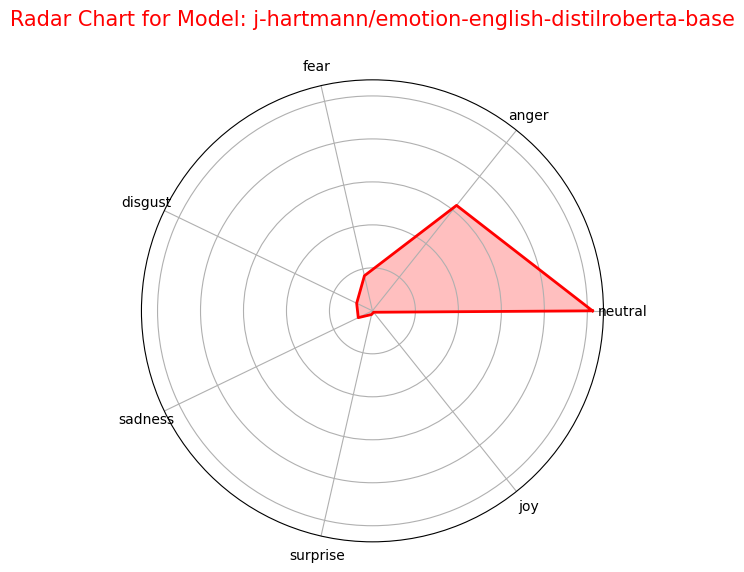

Model: j-hartmann/emotion-english-roberta-large


/usr/local/python/3.10.13/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


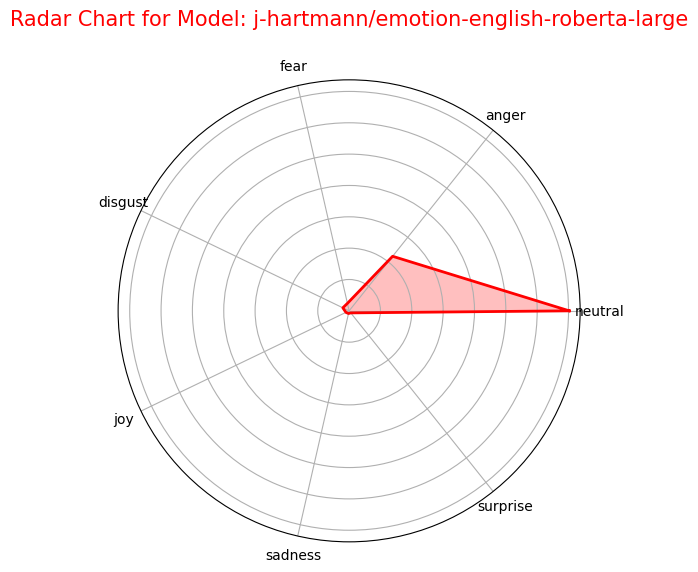

Model: AnkitAI/deberta-xlarge-base-emotions-classifier


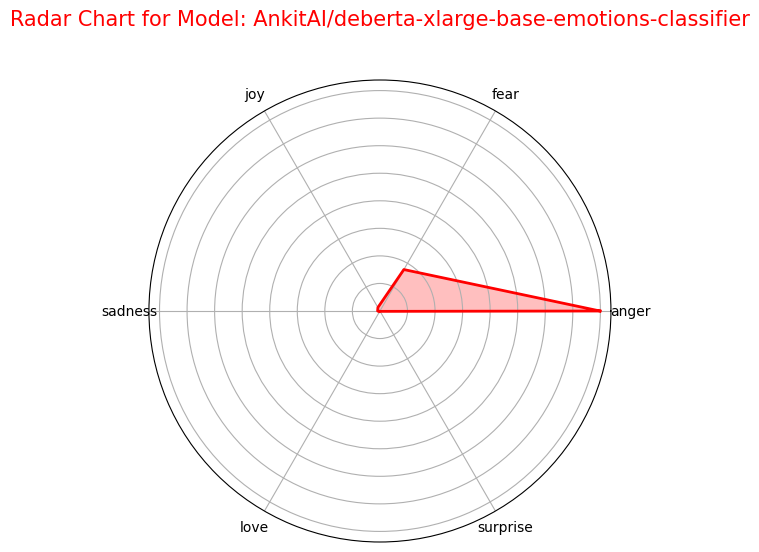

Model: arpanghoshal/EmoRoBERTa
Error with model arpanghoshal/EmoRoBERTa: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/arpanghoshal/EmoRoBERTa.
401 Client Error. (Request ID: Root=1-66fc6434-450ce3fb3582a3305a065d79;c63e9dbb-eff4-4444-ac1d-21d0ba0a198e)

Cannot access gated repo for url https://huggingface.co/arpanghoshal/EmoRoBERTa/resolve/main/config.json.
Access to model arpanghoshal/EmoRoBERTa is restricted. You must have access to it and be authenticated to access it. Please log in.
Model: cardiffnlp/twitter-roberta-base-emotion


/usr/local/python/3.10.13/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


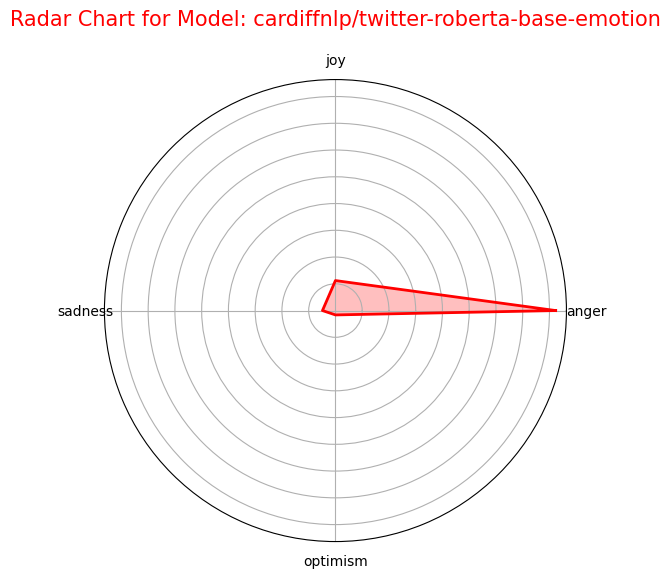

Model: cardiffnlp/twitter-roberta-large-emotion-latest


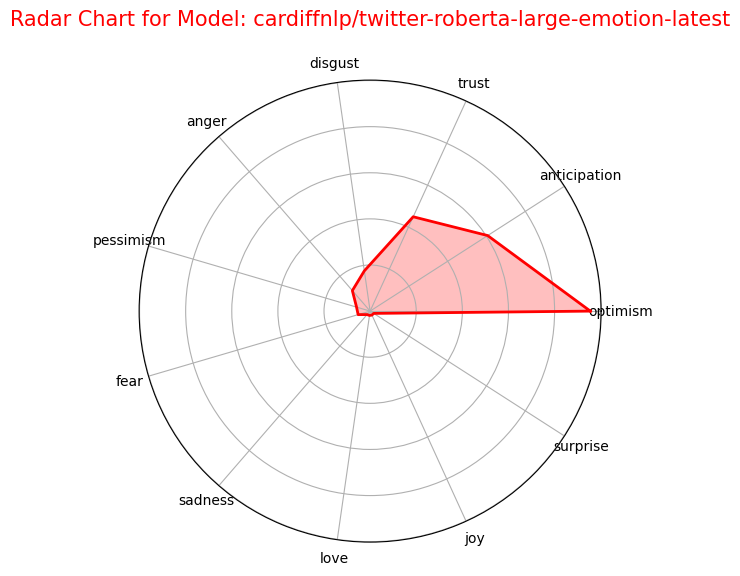

Model: cardiffnlp/twitter-roberta-base-emotion-latest


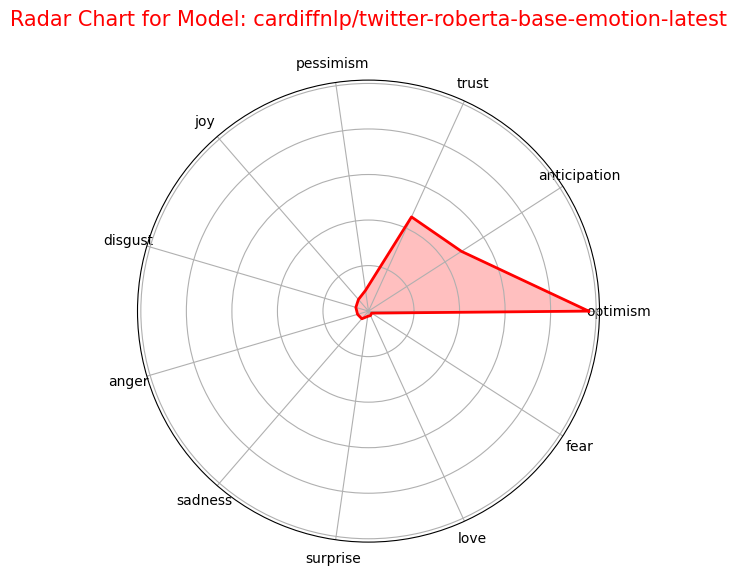

In [12]:
for model in models:
    print(f"Model: {model}")
    try:
        get_emotions(model)
    except Exception as e:
        print(f"Error with model {model}: {e}")